In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *
from fit import *
from fitv2 import *

import h5py

plotter = Plotter()

from scipy.optimize import curve_fit
from iminuit import Minuit

# Critical line

In [2]:
data1 = ConfResults(fn="../data/zcritical_N048_m-0482300_h002000_c00500.h5",thTime=400,dt=0.8, data_format="new")
dt=0.8

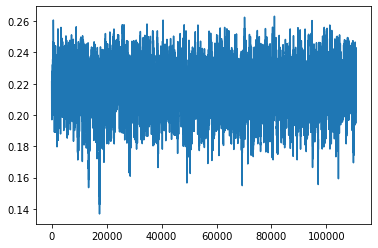

In [3]:
data1.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
plt.show()

Here we fill the data for the AA propagator as function of the frequency


In [3]:
data1.computeOtOtpBlocked("A", momNum = 0, tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))
data1.computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))

#TODO: compute half of it and symmetrize.

True


In [12]:
data1.computeOtOtpBlocked("phi", momNum = 0, tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))
data1.computeStatisticalCor("phi", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))

True


In [4]:
data1.computeFourierPropagator("phi",decim=1000, errFunc = lambda x: bootstrap(x,100))

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


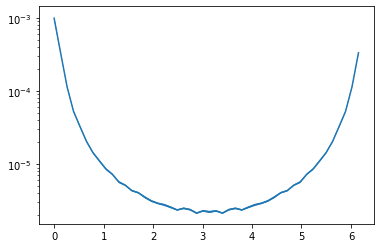

In [5]:
plotter.plot(data1,"propagator", "phi")



plt.yscale('log')

/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/numpy/ma/core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


<ErrorbarContainer object of 3 artists>

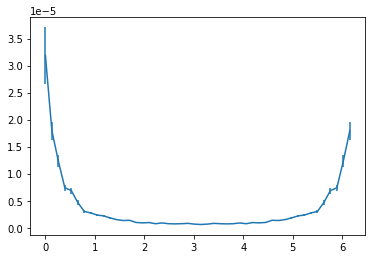

In [11]:
plt.errorbar(data1.momenta_3d, data1.wallFProp["dsigma"].mean,data1.wallFProp["dsigma"].err)


/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/numpy/ma/core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


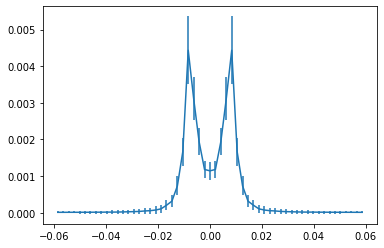

In [11]:
plotter.plot(data1,"OtOttpFourier","A")

In [32]:
fit1=FitResult(data1)
fit2=Fitter(data1)

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


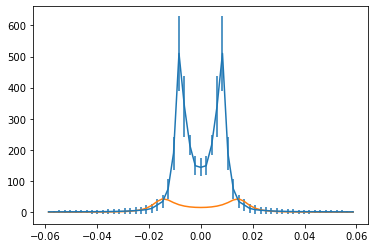

In [51]:
fit1.AApplot(0.016,0.000001,0.01)

In [27]:
fit1.fitAA()

(3.4908513102195076,
 0.06464539463369458,
 54,
 <ValueView mp=0.008654521709925644 amplitudecharge=7.857168009550719e-07 gammap=0.004823222941000571>)

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


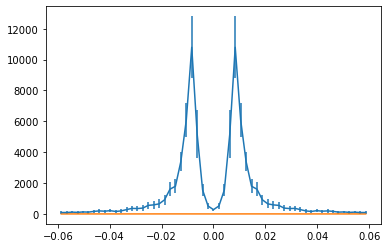

In [50]:
fit1.PPpplot(0.016,0.0001,0.01)

In [84]:
np.concatenate([(1,2),(3,4)], [(5,6),(7,8)])

TypeError: 'list' object cannot be interpreted as an integer

In [46]:
#fit2.setParValues("A", [0.016,0.000001,0.01])
#fit2.setParValues("phi", [0.016,0.000001,0.01])
fit2.setParValues("OtOttpFourier", "Aphi", [0.016,0.000001,0.000001,0.01])
fit2.fit("OtOttpFourier", "Aphi")

(24.333544357618393,
 0.22121403961471267,
 110,
 <ValueView mp=0.008484999162530205 amplitudeA=9.080842060527061e-07 amplitudephi=0.29531899185567556 gammap=0.005429466985395592>)

[0.008484999162530205, 9.080842060527061e-07, 0.29531899185567556, 0.005429466985395592]


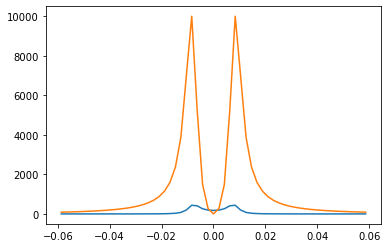

In [47]:
fit2.plot("OtOttpFourier","Aphi")

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


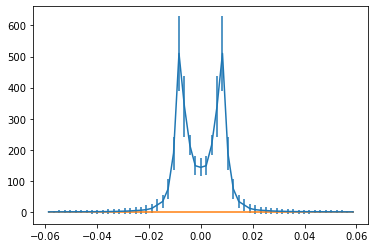

In [26]:
fit1.AApplot()

In [16]:
fit1.AAfit

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 7.208                      │              Nfcn = 271              │
│ EDM = 5.56e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name            │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mp              │  8.72e-3  │  0.23e-3  │  -0.22e-3  │  0.23e-3   │    0    │         │       │
│ 1 │ amplitudecharge │  0.81e-6  │  0.11e-6  │  -0.10e-6  │  0.12e-6   │    0    │         │       │
│ 2 │ gammap          │  5.0e-3   │  0.6e-3   │  -0.5e-3   │   0.6e-3   │    0    │         │       │
└───┴─────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          mp           │    amplitudecharge    │        gammap         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │ -0.22e-3  │  0.23e-3  │ -0.10e-6  │  0.12e-6  │  -0.5e-3  │  0.6e-3   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────────────────┬─────────────────────────────────────────────────┐
│                 │              mp amplitudecharge          gammap │
├─────────────────┼─────────────────────────────────────────────────┤
│              mp │        5.08e-08        2.11e-11        8.45e-08 │
│ amplitudecharge │        2.11e-11        1.16e-14        4.93e-11 │
│          gammap │        8.45e-08        4.93e-11        3.08e-07 │
└─────────────────┴─────────────────────────────────────────────────┘

In [33]:
fit1.fitPP()

(26.040588470529745,
 0.4822331198246249,
 54,
 <ValueView mp=0.008163614639778771 amplitudephi=0.2642814118665193 gammap=0.005102303483312198>)

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


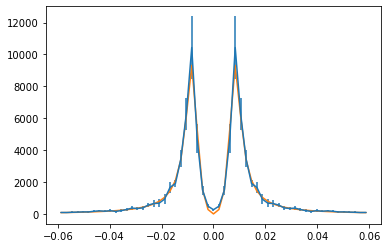

In [96]:
fit1.PPpplot()

In [52]:
fit1.fitAAPP()

(24.308030413502443,
 0.22098209466820404,
 110,
 <ValueView mp=0.008516532644711639 amplitudephi=0.26296901979765996 amplitudecharge=9.309461335149649e-07 gammap=0.0053265100744939176>)

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


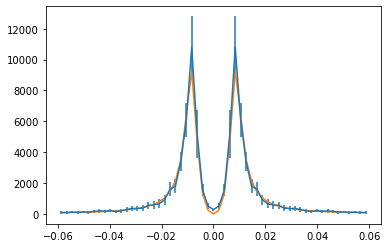

In [54]:
fit1.PPpplot()

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


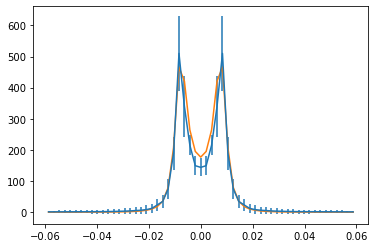

In [55]:
fit1.AApplot()

In [22]:
fit1.AAPPfit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 33.55                      │              Nfcn = 475              │
│ EDM = 7.83e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name            │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mp              │  8.44e-3  │  0.11e-3  │  -0.11e-3  │  0.11e-3   │    0    │         │       │
│ 1 │ amplitudephi    │  2.67e-6  │  0.15e-6  │  -0.15e-6  │  0.15e-6   │    0    │         │       │
│ 2 │ amplitudecharge │  8.3e-12  │  0.9e-12  │  -0.9e-12  │  1.0e-12   │    0    │         │       │
│ 3 │ gammap          │  5.64e-3  │  0.25e-3  │  -0.24e-3  │  0.26e-3   │    0    │         │       │
└───┴─────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          mp           │     amplitudephi      │    amplitudecharge    │        gammap         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │ -0.11e-3  │  0.11e-3  │ -0.15e-6  │  0.15e-6  │ -0.9e-12  │  1.0e-12  │ -0.24e-3  │  0.26e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────────────────┬─────────────────────────────────────────────────────────────────┐
│                 │              mp    amplitudephi amplitudecharge          gammap │
├─────────────────┼─────────────────────────────────────────────────────────────────┤
│              mp │        1.18e-08       -4.31e-12        8.64e-17        1.32e-08 │
│    amplitudephi │       -4.31e-12        2.16e-14       -5.61e-20        8.65e-12 │
│ amplitudecharge │        8.64e-17       -5.61e-20        8.91e-25        1.44e-16 │
│          gammap │        1.32e-08        8.65e-12        1.44e-16        6.29e-08 │
└─────────────────┴─────────────────────────────────────────────────────────────────┘